# Predict the Twitter Accounts to be bots or not bots 


# Import modules

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cross_validation import cross_val_score


%matplotlib inline

/Users/Heng2j/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
names=['id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile','name','bot']

In [6]:
df = pd.read_csv('/Users/Heng2j/Documents/NYU Grad /Spring 2017/Machine Learning/project/merged.csv',encoding="ISO-8859-1",
                 header=None,delim_whitespace=False,names=names,na_values='?',)

In [7]:
# Creating more features from given dataframe
df["screen_name_len"] = [len(i) for i in df["screen_name"]]
df["bot_is_substr"] = [int('bot' in i.lower()) for i in df["screen_name"]]
df["bot_in_des"] = [int('bot' in str(i).lower()) for i in df['description']]

# Getting the ages in years from created_at
ages = []
for i in df["created_at"]:
    if len(i) > 20:
        i = i.split()
        year = int(i[5][:4]) % 2000 
    else:
        i = i.split('/')
        year = int(i[2].split()[0]) % 2000
    age = 17-year
    ages.append(age)
df["age"] = ages


In [48]:
for a in range(1000):
    randomized_Data = df.reindex(np.random.permutation(df.index))

train_df = randomized_Data[:int((len(randomized_Data)+1)*.80)]
test_df = randomized_Data[int((len(randomized_Data)+1)*.80):] 





In [56]:
X_train = train_df.drop('bot', 1)
Y_train = train_df['bot']




X_test = test_df.drop('bot', 1)
Y_test = test_df['bot']

Traning Average accuracy: 0.863845862242
Traning Average Precision: 0.868422279614
Accuracy on test set:  0.881165919283


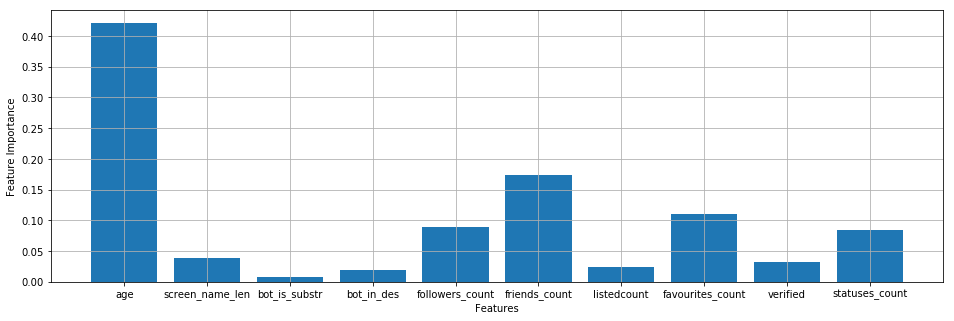

In [60]:



dt = DecisionTreeClassifier(criterion='entropy')

# treeNames are only the numerical and binary features with importance > 0 
treeNames=['age','screen_name_len', 'bot_is_substr','bot_in_des','followers_count','friends_count','listedcount', 'favourites_count','verified','statuses_count']

# Getting the training sets and fitting the tree
df_train = train_df[treeNames+['bot']]
x_train = train_df[treeNames]
y_train = train_df.bot.astype(bool)
dt.fit(x_train, y_train)

# Evaluating the tree with cross-val
accuracy = cross_val_score(dt, x_train, y_train, cv=5, scoring = "accuracy")
precision = cross_val_score(dt, x_train, y_train, cv=5, scoring = "precision")

# Graphing the feature importance 
import matplotlib.pyplot as plt
%matplotlib inline

feature_mi_dict = dict(zip(df_train.columns.values,dt.feature_importances_))
feature_mi_dict
feature_importance_X = feature_mi_dict.keys()
feature_importance_Y = feature_mi_dict.values()
plt.rcParams['figure.figsize'] = (16, 5)
plt.bar(range(len(feature_mi_dict)), feature_mi_dict.values(), align='center')
plt.xticks(range(len(feature_mi_dict)), feature_mi_dict.keys())
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.grid(True)

# Printing the evaluations 
print("Traning Average accuracy:",accuracy.mean())
print("Traning Average Precision:",precision.mean())


predicts = dt.predict(X_test[treeNames])

Test_accuracy = metrics.accuracy_score(test_df['bot'], predicts)

print('Accuracy on test set: ',Test_accuracy )





In [63]:
from sklearn import metrics


# Splitting the set 80-20 with train_test_split from sklearn metrics
#bot = df['bot']
#X_train, X_test, Y_train, Y_test = train_test_split(df[treeNames].ix[:,0:13], bot, test_size=0.2, random_state=42)


min_samples_split_values = list(range(20,70,5))
min_samples_leaf_values = list(range(20,30,1))

test_set_accuracy = []

for i in range(10):
    
    min_samples_split_value = min_samples_split_values[i]
    for j in range(10):
        min_samples_leaf_value = min_samples_leaf_values[j]    
        
        # Fitting and evaluating a tree
        splitDt = DecisionTreeClassifier(criterion='entropy',max_depth = 5, min_samples_split = min_samples_split_value,  min_samples_leaf = min_samples_leaf_value)
        splitDt.fit(X_train[treeNames], Y_train)
        predict = splitDt.predict(X_test[treeNames])
        accuracy = metrics.accuracy_score(predict, Y_test)
    
        test_set_accuracy.append(accuracy)

        
        
print("Maximum Accuracy:", max(test_set_accuracy),"\nMinimum Accuracy:", min(test_set_accuracy))
print("Average Accuracy:",sum(test_set_accuracy)/len(test_set_accuracy))
print(test_set_accuracy)




Maximum Accuracy: 0.887892376682 
Minimum Accuracy: 0.881165919283
Average Accuracy: 0.884125560538
[0.8811659192825112, 0.8811659192825112, 0.8811659192825112, 0.8811659192825112, 0.88565022421524664, 0.88789237668161436, 0.88789237668161436, 0.8811659192825112, 0.88340807174887892, 0.88340807174887892, 0.8811659192825112, 0.8811659192825112, 0.8811659192825112, 0.8811659192825112, 0.88565022421524664, 0.88789237668161436, 0.88789237668161436, 0.8811659192825112, 0.88340807174887892, 0.88340807174887892, 0.8811659192825112, 0.8811659192825112, 0.8811659192825112, 0.8811659192825112, 0.88565022421524664, 0.88789237668161436, 0.88789237668161436, 0.8811659192825112, 0.88340807174887892, 0.88340807174887892, 0.8811659192825112, 0.8811659192825112, 0.8811659192825112, 0.8811659192825112, 0.88565022421524664, 0.88789237668161436, 0.88789237668161436, 0.8811659192825112, 0.88340807174887892, 0.88340807174887892, 0.8811659192825112, 0.8811659192825112, 0.8811659192825112, 0.8811659192825112,

In [30]:
print(randomized_Data[treeNames].ix[:,0:13])

      age  screen_name_len  bot_is_substr  bot_in_des  followers_count  \
123     2               15              0           0             3459   
693     3               11              0           1            17289   
1636    6               12              0           0              381   
1982    7               11              0           0            26522   
1993    3               13              0           0              370   
668     2               14              0           0               79   
47      1               10              1           0              293   
1523    6                9              0           0              121   
1058    8               15              0           0           222659   
787     3               15              0           0               49   
122     5                9              0           0                8   
1750    0               11              0           0                7   
43      3               11            